In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
import requests
from config import weather_api_key
import time
from datetime import datetime


In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add longitudes and latitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the citty is unique add it to the list
    if city not in cities:
        cities.append(city)
        
#POrint the city count
len(cities)


602

In [5]:
cities


['punta arenas',
 'westport',
 'bainbridge',
 'terrace bay',
 'vaini',
 'cape town',
 'jiwani',
 'aswan',
 'berbera',
 'ushuaia',
 'rikitea',
 'saskylakh',
 'kupino',
 'castro',
 'mataura',
 'norman wells',
 'nizhneyansk',
 'hobart',
 'qaanaaq',
 'mecca',
 'barrow',
 'ilulissat',
 'illoqqortoormiut',
 'port alfred',
 'bafoulabe',
 'senneterre',
 'burica',
 'yellowknife',
 'bredasdorp',
 'saldanha',
 'kuche',
 'zhigansk',
 'dikson',
 'trinidad',
 'chuy',
 'port lincoln',
 'hithadhoo',
 'albany',
 'laukaa',
 'maniitsoq',
 'songea',
 'piryion',
 'mayo',
 'cidreira',
 'bonthe',
 'jamestown',
 'makakilo city',
 'mragowo',
 'smolenka',
 'college',
 'havre',
 'marystown',
 'lorengau',
 'bismil',
 'saint-philippe',
 'cabo san lucas',
 'iracoubo',
 'jining',
 'busselton',
 'tsihombe',
 'victor harbor',
 'severo-kurilsk',
 'fairbanks',
 'camacha',
 'tasiilaq',
 'san patricio',
 'verkhoyansk',
 'hami',
 'goderich',
 'bluff',
 'atuona',
 'mount gambier',
 'guanica',
 'manyana',
 'kapaa',
 'namibe'

In [6]:
#Create an empty list
city_data = []

#Create URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
 
#Print the begginning of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create Counter
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all  the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record and set number and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
        #Run an API request for each of the cities
    try:
        #Parse teh JSON and retreieve data
        city_weather = requests.get(city_url).json()

        #Parse of the need data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        #Convert date to standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #append the city info
        city_data.append({"City" : city.title(), 
                         "Lat" : city_lat, 
                         "Lng" : city_lng,
                         "Max Temp" : city_max_temp, 
                         "Humidity" : city_humidity,
                         "Clouds" : city_clouds,
                         "Wind Speed" : city_wind,
                         "Country" : city_country,
                         "Date" : city_date})

    #If an error occurs
    except:
        print(f"City not found. Skipping...")
        pass

#indicate that the data is loading
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | westport
Processing Record 3 of Set 1 | bainbridge
Processing Record 4 of Set 1 | terrace bay
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | jiwani
Processing Record 8 of Set 1 | aswan
Processing Record 9 of Set 1 | berbera
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | kupino
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | mecca
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | ilulissat
Processing Record 23 of Set 1 | illoqqortoormiut
City not found. Skipping...
Process

Processing Record 40 of Set 4 | ormara
Processing Record 41 of Set 4 | chiang khong
Processing Record 42 of Set 4 | novaya igirma
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | seoul
Processing Record 47 of Set 4 | rio gallegos
Processing Record 48 of Set 4 | qandala
Processing Record 49 of Set 4 | hun
Processing Record 50 of Set 4 | shakawe
Processing Record 1 of Set 5 | peniche
Processing Record 2 of Set 5 | balsas
Processing Record 3 of Set 5 | mehamn
Processing Record 4 of Set 5 | askiz
Processing Record 5 of Set 5 | riyadh
Processing Record 6 of Set 5 | san pedro
Processing Record 7 of Set 5 | matamoros
Processing Record 8 of Set 5 | saint george
Processing Record 9 of Set 5 | bethel
Processing Record 10 of Set 5 | kenai
Processing Record 11 of Set 5 | cayenne
Processing Record 12 of Set 5 | alice springs
Processing Record 13 of Set 5 | jaitaran
Processing Record 14 of Set 5 |

Processing Record 30 of Set 8 | isangel
Processing Record 31 of Set 8 | eyl
Processing Record 32 of Set 8 | batsfjord
Processing Record 33 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 34 of Set 8 | le port
Processing Record 35 of Set 8 | bose
Processing Record 36 of Set 8 | kutum
Processing Record 37 of Set 8 | jinchang
Processing Record 38 of Set 8 | beloha
Processing Record 39 of Set 8 | west wendover
Processing Record 40 of Set 8 | maraa
Processing Record 41 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 8 | winnemucca
Processing Record 43 of Set 8 | valparaiso
Processing Record 44 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 45 of Set 8 | moose factory
Processing Record 46 of Set 8 | warri
Processing Record 47 of Set 8 | mitsamiouli
Processing Record 48 of Set 8 | powell river
Processing Record 49 of Set 8 | halifax
Processing Record 50 of Set 8 | arlit
Processing Record 1 of Set 9 | rjukan
Processing Record 2 

Processing Record 18 of Set 12 | amderma
City not found. Skipping...
Processing Record 19 of Set 12 | bargal
City not found. Skipping...
Processing Record 20 of Set 12 | rio rancho
Processing Record 21 of Set 12 | mhlambanyatsi
Processing Record 22 of Set 12 | bangassou
Processing Record 23 of Set 12 | kasongo-lunda
Processing Record 24 of Set 12 | pangnirtung
Processing Record 25 of Set 12 | doha
Processing Record 26 of Set 12 | steinkjer
Processing Record 27 of Set 12 | hambantota
Processing Record 28 of Set 12 | cumra
Processing Record 29 of Set 12 | yumen
Processing Record 30 of Set 12 | rock sound
Processing Record 31 of Set 12 | manado
Processing Record 32 of Set 12 | nuevo casas grandes
Processing Record 33 of Set 12 | sao joao da barra
Processing Record 34 of Set 12 | flin flon
Processing Record 35 of Set 12 | bad berleburg
Processing Record 36 of Set 12 | praia da vitoria
Processing Record 37 of Set 12 | buin
Processing Record 38 of Set 12 | coxim
Processing Record 39 of Set 1

In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,46.51,57,75,10.36,CL,2022-02-04 01:30:50
1,Westport,41.1415,-73.3579,48.16,96,100,3.00,US,2022-02-04 01:31:06
2,Bainbridge,47.6262,-122.5212,49.28,87,100,1.99,US,2022-02-04 01:34:37
3,Terrace Bay,48.7834,-87.1000,-11.58,90,21,5.50,CA,2022-02-04 01:34:37
4,Vaini,-21.2000,-175.2000,86.16,79,75,11.50,TO,2022-02-04 01:32:26
...,...,...,...,...,...,...,...,...,...
546,Nizhneangarsk,55.7833,109.5500,-3.95,94,100,2.30,RU,2022-02-04 01:48:22
547,Rio Claro,-22.4114,-47.5614,73.40,95,99,1.68,BR,2022-02-04 01:48:22
548,Broken Hill,-31.9500,141.4333,69.51,35,0,17.27,AU,2022-02-04 01:48:23
549,Kloulklubed,7.0419,134.2556,84.70,76,30,22.15,PW,2022-02-04 01:46:08


In [16]:
#setup new column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Clouds", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed
0,Punta Arenas,CL,2022-02-04 01:30:50,-53.1500,-70.9167,46.51,57,75,10.36
1,Westport,US,2022-02-04 01:31:06,41.1415,-73.3579,48.16,96,100,3.00
2,Bainbridge,US,2022-02-04 01:34:37,47.6262,-122.5212,49.28,87,100,1.99
3,Terrace Bay,CA,2022-02-04 01:34:37,48.7834,-87.1000,-11.58,90,21,5.50
4,Vaini,TO,2022-02-04 01:32:26,-21.2000,-175.2000,86.16,79,75,11.50
...,...,...,...,...,...,...,...,...,...
546,Nizhneangarsk,RU,2022-02-04 01:48:22,55.7833,109.5500,-3.95,94,100,2.30
547,Rio Claro,BR,2022-02-04 01:48:22,-22.4114,-47.5614,73.40,95,99,1.68
548,Broken Hill,AU,2022-02-04 01:48:23,-31.9500,141.4333,69.51,35,0,17.27
549,Kloulklubed,PW,2022-02-04 01:46:08,7.0419,134.2556,84.70,76,30,22.15


In [18]:
#create a csv file
output_data_file = "cities.csv"

#Export city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
#Extract releveant info
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
clouds = city_data_df["Clouds"]
wind_speed = city_data_df["Wind Speed"]



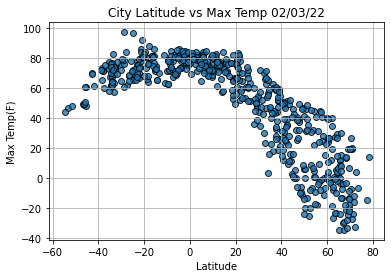

In [37]:
#draw the max temp scatter plot
import time

plt.scatter(lats, max_temps,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = .8,
            label = "Cities"
           )
plt.ylabel("Max Temp(F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs Max Temp " + time.strftime("%x"))
plt.grid()

#Save it
plt.savefig("Lat_vs_MAxTemp.png")

#shwo it 
plt.show()

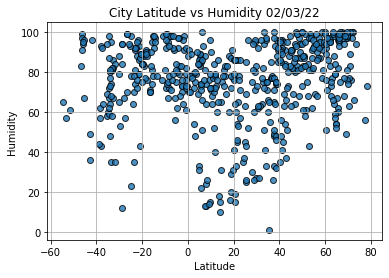

In [40]:
#draw the humidity scatter plot


plt.scatter(lats, humidity,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = .8,
            label = "Cities"
           )
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.grid()

#Save it
plt.savefig("Lat_vs_Humidity.png")

#shwo it 
plt.show()

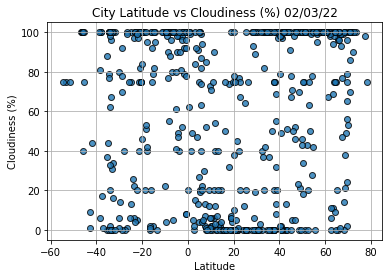

In [42]:
#draw the clousiness scatter plot


plt.scatter(lats, clouds,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = .8,
            label = "Cities"
           )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.grid()

#Save it
plt.savefig("Lat_vs_Clousiness.png")

#shwo it 
plt.show()

In [ ]:
#draw the clousiness scatter plot


plt.scatter(lats, clouds,
            edgecolor = "black",
            linewidths = 1,
            marker = "o",
            alpha = .8,
            label = "Cities"
           )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.grid()

#Save it
plt.savefig("Lat_vs_Clousiness.png")

#shwo it 
plt.show()